In [60]:
import pandas as pd
import scipy.stats as st
import math
import matplotlib.pyplot as plt

# **APS 5 - Intervalos de confiança**

### *Luigi Orlandi, Andre Oliveira e Deena El Orra*

In [61]:
df = pd.read_csv("data/Rocket Data.csv", encoding="utf-8", delimiter=";", skiprows=0, decimal = ".")

df["Avg. Players"] = df["Avg. Players"].str.replace(',', '').astype(float)
df["Peak Players"] = df["Peak Players"].str.replace(',', '').astype(float)
df["Gain"] = df["Gain"].str.replace(',', '').astype(float)
df["% Gain"] = df["% Gain"].str.replace('%', '')

### **Etapas para o calculo de um intervalo de confiança**

1. Primeiramente calculamos a média dos valores totais observados

2. Em segundo lugar contamos o número de ocorrência destes valores

3. Calculamos o desvio padrão dessass médias

4. Por fim adotamos a escala na qual nossos dados foram trabalhados

# Parte 1 - Intervalo de confiança 
## **Média de jogadores mensais**

In [62]:
mu = df["Avg. Players"].mean()
n = df["Avg. Players"].count()
sigma = df["Avg. Players"].std()
escala = sigma/math.sqrt(n)

print(mu)

33124.77171717171


In [63]:
a = st.t.ppf(0.025, df=len(df)-1, loc=mu, scale=escala)
b = st.t.ppf(0.975, df=len(df)-1, loc=mu, scale=escala)

print(a)
print(b)

30996.800256027258
35252.74317831616


# Parte 2 - Intervalo de confiança
## **Ganho médio mensal**

In [64]:
# mu = df["Gain"].mean()
# n = df["Gain"].count()
# sigma = df["Gain"].std()
# escala = sigma/math.sqrt(n)

# print(mu)

In [65]:
# a = st.t.ppf(0.025, df=len(df)-1, loc=mu, scale=escala)
# b = st.t.ppf(0.975, df=len(df)-1, loc=mu, scale=escala)

# print(a)
# print(b)

# Parte 3 - Gráficos de insights

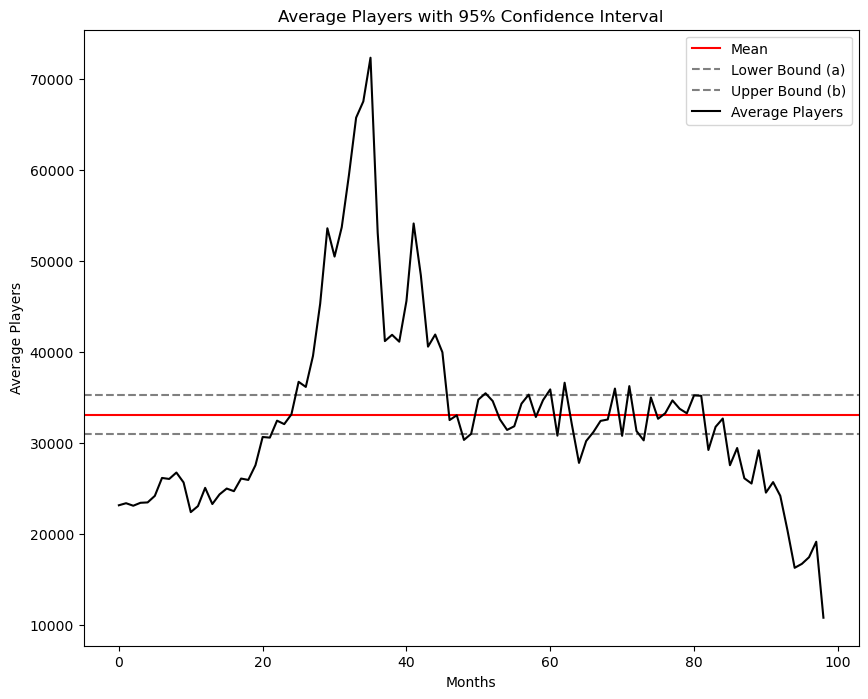

In [83]:
plt.figure(figsize=(10, 8))
plt.errorbar(df.index, df["Avg. Players"], label='Average Players', color='black')
plt.axhline(mu, color='red', label='Mean')
plt.axhline(a, linestyle='--', color='grey', label='Lower Bound (a)')
plt.axhline(b, linestyle='--', color='grey', label='Upper Bound (b)')
plt.title('Average Players with 95% Confidence Interval')
plt.xlabel('Months')
plt.ylabel('Average Players')
plt.legend()
plt.show()